# **Similarity between two structures**

## **Install conda and rdkid**

In [1]:
# Install conda and rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-08 19:11:40--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   173MB/s    in 0.5s    

2021-04-08 19:11:41 (173 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [2]:
import pandas as pd
df = pd.read_csv('CHEMBL614725_2classes_data.csv')
df.head(5)

,molecule_chembl_id,canonical_smiles,pIC50,bioactivity_class
0,CHEMBL2321905,COC(=O)c1cc(-c2ccc(NC(=O)c3cc(NC(=O)CCCOc4cc5c...,11.886057,active
1,CHEMBL2324630,COC(=O)c1cc(-c2ccc(NC(=O)c3nc(NC(=O)CCCOc4cc5c...,11.677781,active
2,CHEMBL4176275,COc1c(Br)c2c(c(OC)c1OC)-c1cc3cc(CO)n(C)c3cc1[C...,10.000000,active
3,CHEMBL2324627,CCOC(=O)c1nc(NC(=O)c2cc(-c3ccc(NC(=O)CCCOc4cc5...,9.958607,active
4,CHEMBL2324629,COC(=O)c1nc(NC(=O)c2cc(NC(=O)c3cc(-c4ccc(NC(=O...,9.602060,active


In [3]:
print(
    ' active',df['bioactivity_class'][df['bioactivity_class']=="active"].count(),'\n',
    'inactive',df['bioactivity_class'][df['bioactivity_class']=="inactive"].count(),'\n'
)

 active 386 
 inactive 386 



In [4]:
acive_canonical_smiles = df['canonical_smiles'][df['bioactivity_class']=="active"]
#acive_canonical_smiles.count()
#len(acive_canonical_smiles)
acive_canonical_smiles.head(3)

0    COC(=O)c1cc(-c2ccc(NC(=O)c3cc(NC(=O)CCCOc4cc5c...
1    COC(=O)c1cc(-c2ccc(NC(=O)c3nc(NC(=O)CCCOc4cc5c...
2    COc1c(Br)c2c(c(OC)c1OC)-c1cc3cc(CO)n(C)c3cc1[C...
Name: canonical_smiles, dtype: object

In [5]:
inacive_canonical_smiles = df['canonical_smiles'][df['bioactivity_class']=="inactive"].reset_index().drop(columns='index')
inacive_canonical_smiles = inacive_canonical_smiles['canonical_smiles']

In [6]:
inacive_canonical_smiles.count()
inacive_canonical_smiles.head(3)

0    O=c1oc2c3c(ccc2c(O)c1Cc1c(O)c2ccc4c(c2oc1=O)CC...
1                      Cc1cn(C/C=C\CN)c(=O)[nH]c1=O.Cl
2                C=C(C(=O)OC)C(OC(=O)c1ccccc1)c1ccccc1
Name: canonical_smiles, dtype: object

## **Calculate SMILE Similarity**

In [7]:
from rdkit import Chem,DataStructs

row_size = len(acive_canonical_smiles) #active
column_size = len(inacive_canonical_smiles) #inactive

table= [ [ 0 for i in range(column_size) ] for j in range(row_size) ]
#np.shape(table)
#pd.DataFrame(table)

for row in range(0,row_size):
  for col in range(0,column_size):
    act_comp = acive_canonical_smiles[row]
    inact_comp = inacive_canonical_smiles[col]

    act_mol = Chem.MolFromSmiles(str(act_comp))
    inact_mol = Chem.MolFromSmiles(str(inact_comp))

    # the default fingerprint is path-based:
    act_fp = Chem.RDKFingerprint(act_mol)
    inact_fp = Chem.RDKFingerprint(inact_mol)

    table[row][col]= DataStructs.TanimotoSimilarity(act_fp,inact_fp)

In [8]:
pd.DataFrame(table)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385
0,0.420045,0.225076,0.285714,0.413156,0.474566,0.456839,0.458427,0.323014,0.367885,0.275301,0.419886,0.312767,0.329353,0.234620,0.544624,0.373057,0.263029,0.120051,0.217870,0.236010,0.276463,0.519587,0.444695,0.312121,0.332744,0.371296,0.321146,0.369449,0.520330,0.278055,0.394948,0.364849,0.172586,0.508242,0.163125,0.525247,0.418327,0.354839,0.118590,0.522765,...,0.304066,0.226103,0.419014,0.379704,0.247543,0.174233,0.307326,0.427749,0.362310,0.368815,0.345465,0.317774,0.392649,0.317774,0.346313,0.384388,0.348139,0.421540,0.441860,0.370284,0.416999,0.300469,0.344137,0.447905,0.387624,0.315789,0.349123,0.225747,0.326615,0.323149,0.063939,0.520157,0.535576,0.513423,0.186047,0.332549,0.470261,0.023422,0.032321,0.493827
1,0.411043,0.224726,0.286659,0.413694,0.482619,0.445923,0.457191,0.321512,0.364503,0.273217,0.414786,0.311246,0.309685,0.243947,0.548092,0.368993,0.257143,0.121579,0.218293,0.237864,0.276675,0.514873,0.444319,0.309036,0.328847,0.372754,0.327639,0.366902,0.523888,0.283042,0.389174,0.371080,0.171004,0.504372,0.163037,0.526287,0.417234,0.352347,0.120844,0.522976,...,0.303404,0.227995,0.415403,0.375637,0.245571,0.174099,0.307418,0.423341,0.363795,0.371051,0.345422,0.321770,0.387601,0.321770,0.340749,0.390764,0.351319,0.416331,0.437430,0.374130,0.417520,0.299825,0.344888,0.446701,0.383411,0.311216,0.345148,0.229129,0.328208,0.322411,0.062262,0.515303,0.538292,0.510295,0.184375,0.329432,0.464128,0.022639,0.031491,0.490787
2,0.433918,0.217254,0.280571,0.409360,0.464581,0.467789,0.450057,0.331110,0.355175,0.276185,0.434731,0.296135,0.274143,0.271383,0.528353,0.369822,0.271565,0.110818,0.224490,0.249682,0.258741,0.511099,0.430213,0.305296,0.336380,0.356635,0.307165,0.350391,0.501670,0.257942,0.387419,0.358120,0.166023,0.493579,0.172888,0.498341,0.410600,0.364370,0.121902,0.499169,...,0.326114,0.229153,0.379553,0.379108,0.220286,0.185852,0.333961,0.443114,0.387018,0.389290,0.354619,0.339196,0.419730,0.339196,0.363748,0.377198,0.346535,0.445455,0.484685,0.375976,0.459492,0.326329,0.345709,0.454386,0.414470,0.331891,0.367359,0.235819,0.331695,0.341943,0.066934,0.547689,0.559770,0.541520,0.190695,0.347666,0.448256,0.023145,0.031060,0.522914
3,0.421260,0.220669,0.286402,0.411968,0.470656,0.445863,0.457143,0.322073,0.366786,0.266866,0.425157,0.307832,0.318408,0.242883,0.554835,0.374353,0.255319,0.123244,0.212029,0.236044,0.281971,0.520652,0.437780,0.300959,0.325541,0.366262,0.325000,0.368359,0.517241,0.279577,0.395415,0.372526,0.170596,0.510159,0.153989,0.527991,0.422792,0.350564,0.118211,0.523836,...,0.302408,0.232187,0.416959,0.381766,0.249847,0.175858,0.309524,0.426521,0.362842,0.382831,0.349254,0.320766,0.398830,0.320766,0.353254,0.390634,0.350330,0.424435,0.443878,0.370006,0.419042,0.301113,0.344706,0.448276,0.393798,0.322657,0.352047,0.232558,0.330368,0.322203,0.065093,0.512792,0.527382,0.505275,0.186951,0.341017,0.471405,0.023346,0.034216,0.486622
4,0.438713,0.222026,0.285714,0.417088,0.473596,0.454001,0.473219,0.325581,0.369983,0.271196,0.429127,0.306471,0.319059,0.244275,0.567323,0.381113,0.260792,0.122311,0.217956,0.240566,0.278313,0.535370,0.446949,0.302095,0.332002,0.372460,0.323095,0.376226,0.529634,0.276775,0.400112,0.373938,0.169360,0.523526,0.155409,0.535272,0.426029,0.354167,0.116779,0.532831,...,0.304969,0.231729,0.424485,0.384444,0.243643,0.175148,0.310405,0.432903,0.363739,0.386312,0.350551,0.320557,0.399545,0.320557,0.352874,0.387579,0.349243,0.426072,0.450610,0.376131,0.422371,0.302961,0.349197,0.458935,0.394647,0.322395,0.357877,0.230633,0.332180,0.324217,0.064378,0.524617,0.538793,0.514722,0.183686,0.340218,0.484699,0.022374,0.034077,0.496442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [9]:
import numpy as np

pd.DataFrame(table).to_csv("MIA-PaCa-2_EDA_similarity_matrix.csv", index=None)

## **Heat Map of Similarity**

In [10]:
import pandas as pd

df2 = pd.read_csv('MIA-PaCa-2_EDA_similarity_matrix.csv')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385
0,0.420045,0.225076,0.285714,0.413156,0.474566,0.456839,0.458427,0.323014,0.367885,0.275301,0.419886,0.312767,0.329353,0.234620,0.544624,0.373057,0.263029,0.120051,0.217870,0.236010,0.276463,0.519587,0.444695,0.312121,0.332744,0.371296,0.321146,0.369449,0.520330,0.278055,0.394948,0.364849,0.172586,0.508242,0.163125,0.525247,0.418327,0.354839,0.118590,0.522765,...,0.304066,0.226103,0.419014,0.379704,0.247543,0.174233,0.307326,0.427749,0.362310,0.368815,0.345465,0.317774,0.392649,0.317774,0.346313,0.384388,0.348139,0.421540,0.441860,0.370284,0.416999,0.300469,0.344137,0.447905,0.387624,0.315789,0.349123,0.225747,0.326615,0.323149,0.063939,0.520157,0.535576,0.513423,0.186047,0.332549,0.470261,0.023422,0.032321,0.493827
1,0.411043,0.224726,0.286659,0.413694,0.482619,0.445923,0.457191,0.321512,0.364503,0.273217,0.414786,0.311246,0.309685,0.243947,0.548092,0.368993,0.257143,0.121579,0.218293,0.237864,0.276675,0.514873,0.444319,0.309036,0.328847,0.372754,0.327639,0.366902,0.523888,0.283042,0.389174,0.371080,0.171004,0.504372,0.163037,0.526287,0.417234,0.352347,0.120844,0.522976,...,0.303404,0.227995,0.415403,0.375637,0.245571,0.174099,0.307418,0.423341,0.363795,0.371051,0.345422,0.321770,0.387601,0.321770,0.340749,0.390764,0.351319,0.416331,0.437430,0.374130,0.417520,0.299825,0.344888,0.446701,0.383411,0.311216,0.345148,0.229129,0.328208,0.322411,0.062262,0.515303,0.538292,0.510295,0.184375,0.329432,0.464128,0.022639,0.031491,0.490787
2,0.433918,0.217254,0.280571,0.409360,0.464581,0.467789,0.450057,0.331110,0.355175,0.276185,0.434731,0.296135,0.274143,0.271383,0.528353,0.369822,0.271565,0.110818,0.224490,0.249682,0.258741,0.511099,0.430213,0.305296,0.336380,0.356635,0.307165,0.350391,0.501670,0.257942,0.387419,0.358120,0.166023,0.493579,0.172888,0.498341,0.410600,0.364370,0.121902,0.499169,...,0.326114,0.229153,0.379553,0.379108,0.220286,0.185852,0.333961,0.443114,0.387018,0.389290,0.354619,0.339196,0.419730,0.339196,0.363748,0.377198,0.346535,0.445455,0.484685,0.375976,0.459492,0.326329,0.345709,0.454386,0.414470,0.331891,0.367359,0.235819,0.331695,0.341943,0.066934,0.547689,0.559770,0.541520,0.190695,0.347666,0.448256,0.023145,0.031060,0.522914
3,0.421260,0.220669,0.286402,0.411968,0.470656,0.445863,0.457143,0.322073,0.366786,0.266866,0.425157,0.307832,0.318408,0.242883,0.554835,0.374353,0.255319,0.123244,0.212029,0.236044,0.281971,0.520652,0.437780,0.300959,0.325541,0.366262,0.325000,0.368359,0.517241,0.279577,0.395415,0.372526,0.170596,0.510159,0.153989,0.527991,0.422792,0.350564,0.118211,0.523836,...,0.302408,0.232187,0.416959,0.381766,0.249847,0.175858,0.309524,0.426521,0.362842,0.382831,0.349254,0.320766,0.398830,0.320766,0.353254,0.390634,0.350330,0.424435,0.443878,0.370006,0.419042,0.301113,0.344706,0.448276,0.393798,0.322657,0.352047,0.232558,0.330368,0.322203,0.065093,0.512792,0.527382,0.505275,0.186951,0.341017,0.471405,0.023346,0.034216,0.486622
4,0.438713,0.222026,0.285714,0.417088,0.473596,0.454001,0.473219,0.325581,0.369983,0.271196,0.429127,0.306471,0.319059,0.244275,0.567323,0.381113,0.260792,0.122311,0.217956,0.240566,0.278313,0.535370,0.446949,0.302095,0.332002,0.372460,0.323095,0.376226,0.529634,0.276775,0.400112,0.373938,0.169360,0.523526,0.155409,0.535272,0.426029,0.354167,0.116779,0.532831,...,0.304969,0.231729,0.424485,0.384444,0.243643,0.175148,0.310405,0.432903,0.363739,0.386312,0.350551,0.320557,0.399545,0.320557,0.352874,0.387579,0.349243,0.426072,0.450610,0.376131,0.422371,0.302961,0.349197,0.458935,0.394647,0.322395,0.357877,0.230633,0.332180,0.324217,0.064378,0.524617,0.538793,0.514722,0.183686,0.340218,0.484699,0.022374,0.034077,0.496442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

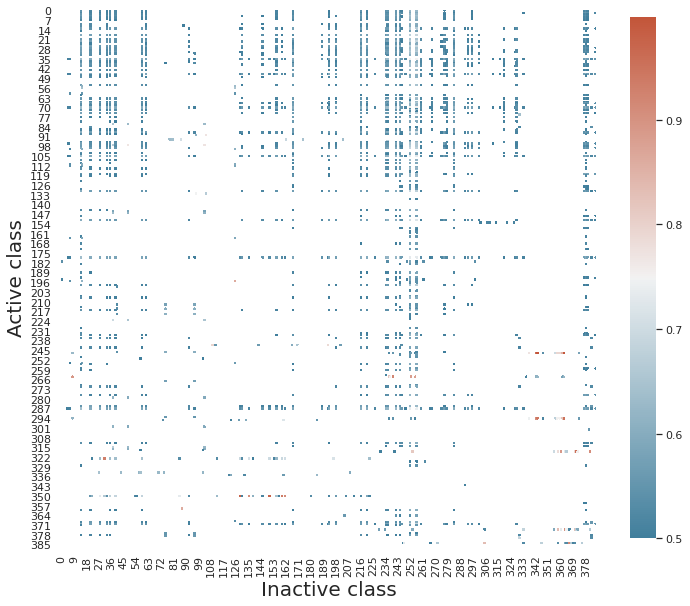

In [11]:
#from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.abs(df2) < 0.5

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2, mask=mask, cmap=cmap, cbar_kws={"shrink":.8}, square=True) #, vmax=.3, center=0, square=True, linewidths=.5

plt.xlabel('Inactive class', fontsize=20)
plt.ylabel('Active class', fontsize=20)

#fig.suptitle('Correlation matrix of bioactivity classes', fontsize=15)

plt.savefig('MIA-PaCa-2_EDA_heatmap_similarity.pdf')